# Pandas Tutorial

In [1]:
# Importing pandas

import pandas as pd
import numpy as np

In [3]:
# Checking pandas version
pd.__version__

'1.1.3'

In [4]:
# Package description
pd?

# Introducing Pandas Objects

## Series

In [5]:
data = pd.Series([1,2,3,4,5])
data

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [6]:
# Obtaining Series values
print(data.values)

[1 2 3 4 5]


In [7]:
# Obtaining the index
data.index


RangeIndex(start=0, stop=5, step=1)

In [8]:
#Accessing data
print('Element {} from Series: {}\n'.format(0,data[0]))
# Using slices/Fatiando o array
print('Series Elements:\n')
print(data[0:4])

Element 0 from Series: 1

Series Elements:

0    1
1    2
2    3
3    4
dtype: int64


## Series as a generalization of numpy array

In [9]:
data = pd.Series([5,10,15,20,25],index = ['a','b','c','d','e'])
data

a     5
b    10
c    15
d    20
e    25
dtype: int64

In [10]:
# Accessing value by index
data['a']

5

In [11]:
# The indices can be non sequential
data.index = ['a',1,'b',2,'c']
print(data['a'],data[1],data['b'],data[2],data['c'])

5 10 15 20 25


### Series as specialized dictionary

In [12]:
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
population = pd.Series(population_dict)

In [13]:
population['California']

38332521

In [14]:
#With Series is possible to perform array slicing in non-numeric data
population['California':'Florida']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

In [15]:
# By default, index is a integer sequence
pd.Series(range(2,7,2))

0    2
1    4
2    6
dtype: int64

In [16]:
# If data is a single value and multiple indices are given, the value is repeated to fill the indexes
pd.Series(10,index = range(3))

0    10
1    10
2    10
dtype: int64

In [17]:
# As seen before, data can be a dictionary, and its keys can be choosed by informing it in index argument
pd.Series({2:'a',1:'b',3:'c'},index = [3,2])


3    c
2    a
dtype: object

## The Pandas DataFrame Object

In [18]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
'Florida': 170312, 'Illinois': 149995}

In [19]:
area = pd.Series(area_dict)

In [20]:
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [21]:
states = pd.DataFrame({'population':population,'area':area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [22]:
#accessing the indices:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [23]:
#acessing the columns
states.columns

Index(['population', 'area'], dtype='object')

### DataFrame as specialized dictionary.

In [24]:
print('state área: \n')
states['area']

state área: 



California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

### Constructing DataFrame objects

In [25]:
# From a single series
pd.DataFrame(population,columns = ['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [26]:
# From a list of dicts

data = [{'a':i,'b':2*i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [27]:
# If some keys in the dictionary are missing, Pandas will fill them with NaN

pd.DataFrame([{'a':1,'b':2},{'b':3,'c':4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [28]:
# From a dictionary of Series objects
pd.DataFrame({'population': population,
'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [29]:
# From a NumPy structured array
pd.DataFrame(np.random.rand(3,2),columns = ['foo','bar'],index = ['a','b','c'])

,foo,bar
a,0.433919,0.904497
b,0.418850,0.690105
c,0.794846,0.047573


In [30]:
# From a NumPy structured array
A = np.zeros(3,dtype = [('A','i8'),('B','f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [31]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## Pandas Index Object

In [32]:
# Index => immutable array or ordered set

In [33]:
ind = pd.Index([2,3,4,5,7,11])

### Index as immutable array

In [34]:
# its access is equal to ordinary lists
ind[1]

3

In [35]:
# Is also possible to perform array slicing
ind[::-1]

Int64Index([11, 7, 5, 4, 3, 2], dtype='int64')

In [36]:
# The main difference it is the fact that the Index object are immutable
ind[1]=0

TypeError: Index does not support mutable operations

### Index as ordered set/Index as ordered set

In [37]:
indA = pd.Index([1,3,5,7,9])
indB = pd.Index([2,3,5,7,11])
print('Intersection: ',indA & indB) #intersection
print('Union: ',indA | indB)
print('Symmetric Difference: ',indA^indB)

Intersection:  Int64Index([3, 5, 7], dtype='int64')
Union:  Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Symmetric Difference:  Int64Index([1, 2, 9, 11], dtype='int64')


In [38]:
#Using methods
print('Intersection:    ',indA.intersection(indB))
print('Union:   ',indA.union(indB))
print('Symmetric Difference:    ',indA.symmetric_difference(indB))

Intersection:     Int64Index([3, 5, 7], dtype='int64')
Union:    Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Symmetric Difference:     Int64Index([1, 2, 9, 11], dtype='int64')


# Data Indexing and Selection

In [39]:
data = pd.Series([0.25,0.5,0.75,1],index = ['a','b','c','d'])

In [40]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [41]:
# is possible to check indices using dictionary like expressions
print('a' in data)
print(data.keys())
print(list(data.items()))

True
Index(['a', 'b', 'c', 'd'], dtype='object')
[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]


## Series as one-dimensional array

In [42]:
# slicing is possible by explicit index(inclusive)
print(data['a':'c'])
# is also possible to slice by implicit integer index(exclusive)
print(data[0:2])
# masking
print(data[(data>0.3)&(data<0.6)])

a    0.25
b    0.50
c    0.75
dtype: float64
a    0.25
b    0.50
dtype: float64
b    0.5
dtype: float64


## indexers: loc, iloc e ix:


In [43]:
# To avoid confusion between implict and explicit indexing, pandas provides indexer attributes that exposes the indexing schemes
data = pd.Series(['a','b','c'],index = [1,3,5])
# explicit index when indexing
print('indexing:\n',data[1])
# implicit index when slicing
print('slicing:\n',data[1:3])

indexing:
 a
slicing:
 3    b
5    c
dtype: object


In [44]:
#.loc: explicit indexing
# iloc: implicit indexing
print(data.loc[1])
print(data.loc[1:5])

a
1    a
3    b
5    c
dtype: object


In [45]:
print(data.iloc[1])
print(data.iloc[1:5])

b
3    b
5    c
dtype: object


# Data Selection in DataFrame

## DataFrame as a dictionary

In [46]:
area = pd.Series({'California': 423967, 'Texas': 695662,
'New York': 141297, 'Florida': 170312,
'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127, 'Florida': 19552860,
'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [47]:
# Access like dictionary
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [48]:
# Access like class
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [49]:
# those methods are equivalent
data.area is data['area']

True

In [50]:
data.pop is data['pop']

False

In [51]:
# is possible to add another column by using a
# dictionary-like structure
data['density'] = data['pop']/data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


## DataFrame as two-dimensional array

In [52]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [53]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [54]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [55]:
data.iloc[:3,:2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [56]:
data.loc[:'Illinois',:'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [57]:
data.loc[data.density>100,['pop','density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [58]:
print(data)
data.iloc[0,2] = 90
print('\n')
print('After the indexing assignment: \n')
print(data)

              area       pop     density
California  423967  38332521   90.413926
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763


After the indexing assignment: 

              area       pop     density
California  423967  38332521   90.000000
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
Illinois    149995  12882135   85.883763


## Additional indexing conventions

In [59]:
print('slicing refers to rows: \n')
print(data['Florida':'Illinois'])
print('\n')
print(data[3:])
print('\n')
print(data[data.density>100])

slicing refers to rows: 

            area       pop     density
Florida   170312  19552860  114.806121
Illinois  149995  12882135   85.883763


            area       pop     density
Florida   170312  19552860  114.806121
Illinois  149995  12882135   85.883763


            area       pop     density
New York  141297  19651127  139.076746
Florida   170312  19552860  114.806121


# Operating on Data in Pandas

## Ufuncs: Index Preservation

In [60]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10,4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [61]:
df = pd.DataFrame(rng.randint(0,10,(3,4)),columns=['A','B','C','D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [62]:
#applying ufuncs to series also returns a series object
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [63]:
# The same holds to dataframes
np.sin(df*np.pi/4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


## UFuncs: Index Alignment

### Index alignment in Series

In [64]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127}, name='population')

In [65]:
# Calculating the density
population/area
# Note that this operation returns the union of
# both arrays.
# Obs: items without reference in any of the arrays are filled with NaNs

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [66]:
# Checking the union set
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [67]:
# Another example
A = pd.Series(np.random.randint(1,10,3),index = [0,1,2])
B = pd.Series(np.random.randint(1,10,3),index = [1,2,3])
A+B

0     NaN
1     8.0
2    13.0
3     NaN
dtype: float64

In [68]:
#To fill NaN values, one should use:
print('A = \n')
print(A)
print('\n')
print('B = \n')
print(B)
print('\n')
print('A+B = \n')
A.add(B,fill_value = 0)

A = 

0    1
1    2
2    8
dtype: int64


B = 

1    6
2    5
3    6
dtype: int64


A+B = 



0     1.0
1     8.0
2    13.0
3     6.0
dtype: float64

## Index Alignment in DataFrame

In [69]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)),
columns=list('AB'))

In [70]:
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
columns=list('BAC'))

In [71]:
A+B

,A,B,C
0,4.0,14.0,NaN
1,17.0,19.0,NaN
2,NaN,NaN,NaN


In [72]:
fill = A.stack().mean()
A.add(B,fill_value = fill)

,A,B,C
0,4.0,14.0,14.5
1,17.0,19.0,13.5
2,13.5,16.5,13.5


### Ufuncs: Operations Between DataFrames and Series

In [73]:
A = np.random.randint(10,size = (3,4))
df = pd.DataFrame(A,columns = list('QRST'))

In [74]:
#subtracting the dataframe by the 1st row
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,3,-3,-9,2
2,2,-3,-3,1


In [75]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,0,-7
1,1,0,-6,-2
2,0,0,0,-3


In [76]:
halfrow = df.iloc[0, ::2]
halfrow

Q    4
S    9
Name: 0, dtype: int64

In [77]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,3.0,NaN,-9.0,NaN
2,2.0,NaN,-3.0,NaN


## Missing Data in Pandas

In [78]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [79]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
55.2 ms ± 360 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.52 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



In [80]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [81]:
vals2 = np.array([1,np.nan,3,4])
vals2.dtype

dtype('float64')

In [82]:
# Nan  with other operations
print(1+np.nan)
print(0*np.nan)
print(vals2.sum())
print(vals2.max())
print(vals2.min())

nan
nan
nan
nan
nan


In [83]:
# Nan safe operations
np.nansum(vals2),np.nanmin(vals2),np.nanmax(vals2)


(8.0, 1.0, 4.0)

### NaN and None in Pandas

In [84]:
pd.Series([1,np.nan,2,None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [85]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [86]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

In [87]:
'''
Pandas handling of NAs by type

Typeclass |  Conversion  |    sentinel value
---------------------------------------------
floating  |  No change   |    np.nan
object    |  No change   |    None or np.nan
integer   |  float64     |    np.nan
boolean   |  object      |    None or np.nan

'''

'\nPandas handling of NAs by type\n\nTypeclass |  Conversion  |    sentinel value\n---------------------------------------------\nfloating  |  No change   |    np.nan\nobject    |  No change   |    None or np.nan\ninteger   |  float64     |    np.nan\nboolean   |  object      |    None or np.nan\n\n'

In [88]:
'''
isnull(): Generate a Boolean mask indicating missing values

notnull(): Opposite of isnull()

fillna():  Return a copy of the data with missing
values filled or imputed

dropna():  Return a filtered version of the data



'''

'\nisnull(): Generate a Boolean mask indicating missing values\n\nnotnull(): Opposite of isnull()\n\nfillna():  Return a copy of the data with missing\nvalues filled or imputed\n\ndropna():  Return a filtered version of the data\n\n\n\n'

### Detecting null values

In [89]:
data = pd.Series([1,np.nan,'hello',None])
# isnull()
print('Using isnull():\n')

print(data.isnull())

Using isnull():

0    False
1     True
2    False
3     True
dtype: bool


In [90]:
# Masking with isnull()
print("Null data :\n")
data[data.isnull()]

Null data :



1     NaN
3    None
dtype: object

In [91]:
# Masking with notnull()
print("Not Null data: \n")
print(data[data.notnull()])

Not Null data: 

0        1
2    hello
dtype: object


### Dropping null values

In [92]:
data.dropna()

0        1
2    hello
dtype: object

In [93]:
# DataFrame example
df = pd.DataFrame([[1,
np.nan, 2],
[2,
3,
5],
[np.nan, 4,
6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [94]:
# dropna removes any line or row with any NaN occurence by default
print("Row case: \n")
print(df.dropna())
print("\n")
print("Column case: \n")
print(df.dropna(axis = 'columns'))

Row case: 

     0    1  2
1  2.0  3.0  5


Column case: 

   2
0  2
1  5
2  6


In [95]:
# However, is possible to tune dropna parameters
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [96]:
#Ex1
df.dropna(axis = 'columns',how = 'all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [97]:
#Ex2
df.dropna(axis = 'rows',thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


### Filling null values

In [98]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [99]:
# Method 1
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [100]:
# Method 2
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [101]:
#Method 3
data.fillna(method = 'bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [102]:
# DataFrame examples
#Ex1(remember to specify an axis!!!!)
df.fillna(method = 'ffill',axis = 1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## Hierarhical Indexing

In [103]:
index = [('California', 2000), ('California', 2010),
('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]
# the bad way....
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [104]:
# Slicing......
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [105]:
# Selecting 2010 data (compromises readability)
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

## The better way: Pandas Multindex

In [106]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [107]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [108]:
# Accessing populations in 2010
pop[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [109]:
# Converting an multindex Series into a DataFrame
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [110]:
#stack is the inverse operation
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [111]:
pop_df = pd.DataFrame({'total': pop,
'under18': [9267089, 9284094,
4687374, 4318033,
5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [112]:
f_u18 = pop_df['under18']/pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


## Methods of MultiIndex Creation

In [113]:
# Method 1
df = pd.DataFrame(np.random.rand(4, 2),
index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
columns=['data1', 'data2'])
df

data1     data2
a 1  0.165720  0.285225
  2  0.080915  0.820961
b 1  0.500626  0.927900
  2  0.985014  0.713893

In [114]:
# Method 2: with dictionaries
data = {('California', 2000): 33871648,
('California', 2010): 37253956,
('Texas', 2000): 20851820,
('Texas', 2010): 25145561,
('New York', 2000): 18976457,
('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

### Explicit MultiIdex Constructors

In [115]:
# Using Arrays
pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [116]:
# Using Tuples
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [117]:
# Using cartesian product
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [118]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [119]:
# From DataFrame
df = pd.DataFrame([['a', '1'], ['a','2'],['b', '1'], ['b', '2']],columns=['a', 'b'])
pd.MultiIndex.from_frame(df)

MultiIndex([('a', '1'),
            ('a', '2'),
            ('b', '1'),
            ('b', '2')],
           names=['a', 'b'])

### MultiIndex level names

In [120]:
pop.index.names = ['state','year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### MultiIndex for columns

In [121]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])

In [122]:
index,columns

(MultiIndex([(2013, 1),
             (2013, 2),
             (2014, 1),
             (2014, 2)],
            names=['year', 'visit']),
 MultiIndex([(  'Bob',   'HR'),
             (  'Bob', 'Temp'),
             ('Guido',   'HR'),
             ('Guido', 'Temp'),
             (  'Sue',   'HR'),
             (  'Sue', 'Temp')],
            names=['subject', 'type']))

In [123]:
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

In [124]:
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      48.0  38.9  40.0  38.5  40.0  36.6
     2      29.0  39.1  36.0  37.1  38.0  37.7
2014 1      36.0  36.5  37.0  37.3  56.0  37.8
     2      55.0  38.1  35.0  35.9  22.0  36.4

In [125]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      40.0  38.5
     2      36.0  37.1
2014 1      37.0  37.3
     2      35.0  35.9

## Indexing and Slicing a MultiIndex

### Multiply Indexed Series

In [126]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [127]:
# Population in California, year 2000
pop['California',2000]

33871648

In [128]:
#Partial slicing - California and New York in 2000
pop.loc['California':'New York',2000]

state       year
California  2000    33871648
New York    2000    18976457
dtype: int64

In [129]:
# All states in 2000:
pop[:,2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [130]:
pop[pop>22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [131]:
# Fancy indexing
pop[['California','Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

### Multiple indexed DataFrames

In [132]:
health_data['Guido','HR']

year  visit
2013  1        40.0
      2        36.0
2014  1        37.0
      2        35.0
Name: (Guido, HR), dtype: float64

In [133]:
health_data.iloc[:2,:2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      48.0  38.9
     2      29.0  39.1

In [134]:
health_data.loc[:, ('Bob', 'Temp')]

year  visit
2013  1        38.9
      2        39.1
2014  1        36.5
      2        38.1
Name: (Bob, Temp), dtype: float64

In [135]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,48.0,40.0,40.0
2014,1,36.0,37.0,56.0


### Sorted and unsorted indices

In [136]:
# Many of the multiIndex slicing will fail if the index is not sorted
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.183408
      2      0.833089
c     1      0.969495
      2      0.425025
b     1      0.876681
      2      0.951824
dtype: float64

In [137]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [138]:
data = data.sort_index()
data

char  int
a     1      0.183408
      2      0.833089
b     1      0.876681
      2      0.951824
c     1      0.969495
      2      0.425025
dtype: float64

In [139]:
# With sorted data, slicing works
data['a':'b']

char  int
a     1      0.183408
      2      0.833089
b     1      0.876681
      2      0.951824
dtype: float64

### Stacking and Unstacking indices

In [140]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [141]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


### Index setting and resetting

In [142]:
pop_flat = pop.reset_index(name = 'population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [143]:
pop_flat.set_index(['state','year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

## Data Aggregations on Multi-Indices

In [144]:
data_mean = health_data.mean(level = 'year')
data_mean

subject   Bob       Guido         Sue       
type       HR  Temp    HR  Temp    HR   Temp
year                                        
2013     38.5  39.0  38.0  37.8  39.0  37.15
2014     45.5  37.3  36.0  36.6  39.0  37.10

In [145]:
data_mean = health_data.mean(axis= 1,level = 'subject')
data_mean

subject       Bob  Guido    Sue
year visit                     
2013 1      43.45  39.25  38.30
     2      34.05  36.55  37.85
2014 1      36.25  37.15  46.90
     2      46.55  35.45  29.20

## Combining Datasets: Concat and Append

In [146]:
def make_df(cols,ind):
    "Quickly make a DataFrame"
    data = {c: [str(c) + str(i) for i in ind]
    for c in cols}
    return pd.DataFrame(data, ind)

In [147]:
ser1 = pd.Series(['A','B','C'],index = [1,2,3])
ser2 = pd.Series(['D','E','F'],index = [4,5,6])
pd.concat([ser1,ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [148]:
# This also works with dataframes
df1 = make_df('AB',[1,2])
df2 = make_df('AB',[3,4])
print(df1);print(df2);print(pd.concat([df1,df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [149]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis=1))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


In [150]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index

In [151]:
pd.concat([x,y])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [152]:
#Catching the repeats as an error
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [153]:
# We can also skip the repeated index 
print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [154]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); 
print(df6);
print(pd.concat([df5, df6],axis = 0))
# note the presence of NaNs in the concatenated
# datasets
# this is because by default the join mode is set to 'outter'

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


### Concatenation with joins

In [155]:
print('df5: \n');print(df5);print('\ndf6: \n'); print(df6);print('\ndf5 inner df6: \n')
print(pd.concat([df5, df6], join='inner'))

df5: 

    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6: 

    B   C   D
3  B3  C3  D3
4  B4  C4  D4

df5 inner df6: 

    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [156]:
print('df5: \n');print(df5);print('\ndf6: \n'); print(df6);print('\ndf5 inner df6: \n')

df5: 

    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6: 

    B   C   D
3  B3  C3  D3
4  B4  C4  D4

df5 inner df6: 



In [157]:
# append() method
print('df1: \n');print(df1);print('\n');print('df2: \n') ;print(df2);print('\n');print('df1.append(df2)\n');print(df1.append(df2))

df1: 

    A   B
1  A1  B1
2  A2  B2


df2: 

    A   B
3  A3  B3
4  A4  B4


df1.append(df2)

    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


## Combining Datasets: Merge and Join

In [158]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print('df1: \n');print(df1);print('df2: \n'); print(df2)

df1: 

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
df2: 

  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [159]:
df3 = pd.merge(df1,df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [160]:
# Many-to-one-joins
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})
print('df3: \n');print(df3);print('\n');print('df4: \n'); print(df4);print('\n');print('df merged: \n');print(pd.merge(df3, df4))

df3: 

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


df4: 

         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve


df merged: 

  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [161]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'],'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})

In [162]:
print('df1:\n')
print(df1)
print('\n')
print('df5: \n')
print(df5)
print('\n')
print('merged: \n')
print(pd.merge(df1,df5))

df1:

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR


df5: 

         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization


merged: 

  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


## Specification of the Merge Key

### The on keyword

In [163]:
pd.merge(df1,df2,on = 'employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### The left_on and right_on keywords

In [164]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]})
print('df1:\n')
print(df1)
print('\n')
print('df3:\n')
print(df3)
print('\n')
print('df merged:\n')
print(pd.merge(df1,df3,left_on = 'employee',right_on = 'name').drop('name',axis=1))

df1:

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR


df3:

   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


df merged:

  employee        group  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR   90000


### The left_index and right_index keywords

In [165]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print('df1a:\n');print(df1a);
print('\n');
print('df2a:\n');
print(df2a)
print('\n')
print('df merged \n')
print(pd.merge(df1a, df2a, left_index=True, right_index=True))
print('\n')

df1a:

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR


df2a:

          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


df merged 

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014




In [166]:
# Alternatively, one can use join
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [167]:
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


## Specifying Set Arithmetic for Joins

In [168]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
'food': ['fish', 'beans', 'bread']},
columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
'drink': ['wine', 'beer']},
columns=['name', 'drink'])
# inner join
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [169]:
# outer join
print(pd.merge(df6, df7,how = 'outer'))

     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [170]:
# left join
print(pd.merge(df6, df7,how = 'left'))

    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [171]:
# right join
print(pd.merge(df6, df7,how = 'right'))

     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer


## Overlapping Column Names: The suffixes Keyword

In [172]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [173]:
#Changing suffixes
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


## Example: US States Data

In [174]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

In [181]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [182]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [183]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [184]:
merged = pd.merge(pop, abbrevs, how = 'outer',
                 left_on = 'state/region',right_on = 'abbreviation')
merged = merged.drop('abbreviation',1)
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [186]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [188]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [191]:
merged.loc[merged['state'].isnull(),'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [195]:
# fixing the issue in the state column!
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [196]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [197]:
# checking the null terms
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [199]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [200]:
final.dropna(inplace = True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [203]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [204]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [205]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [206]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## Aggregation and Grouping

In [6]:
import seaborn as sns

In [208]:
planets = sns.load_dataset('planets')

In [211]:
planets.shape

(1035, 6)

In [212]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [217]:
planets.isnull().any()

method            False
number            False
orbital_period     True
mass               True
distance           True
year              False
dtype: bool

In [218]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### Pandas aggregation methods

In [223]:
#count()
#first(),last()
#mean(), median()
#min(),max()
#std(),var()
#mad()
#prod()
#sum()

## GroupBy: Split, Apply, Combine

In [233]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data': range(6)}, columns=['key', 'data'])

In [240]:
df.groupby(by = 'key').mad()

,data
key,
A,1.5
B,1.5
C,1.5


In [243]:
#Column indexing
planets.groupby(by = 'method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [250]:
# Iteration over groups
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [254]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


## Aggregate, filter, transform, apply

In [257]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [267]:
# Aggregation: example 1
df.groupby('key').aggregate(['min',np.median,max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [271]:
# Aggregation: example 2 - lambda functions
df.groupby('key').aggregate([('q25',lambda x: np.percentile(x,25)),
                             ('q50',lambda x: np.percentile(x,50)),
                             ('q75',lambda x: np.percentile(x,75))])

data1            data2           
      q25  q50   q75   q25  q50   q75
key                                  
A    0.75  1.5  2.25  3.50  4.0  4.50
B    1.75  2.5  3.25  1.75  3.5  5.25
C    2.75  3.5  4.25  4.50  6.0  7.50

In [275]:
# Aggregation: dictionary mapping column names to operations
df.groupby('key').aggregate({'data1':'min','data2':'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [277]:
def filter_func(x):
    return x['data2'].std() > 4

In [279]:
# Raw dataframe
print(df);
# Obtaining the standard deviation per key
print(df.groupby('key').std());
# filtering the keys which have more than 4 stds
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [280]:
# centering data by key
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [282]:
# apply method
def norm_by_data2(x):
# x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x
print(df); 
print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [295]:
# defining which terms sums with each other
L = [0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


In [296]:
print(df); print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
key              
A        3      8
B        5      7
C        7     12


In [285]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant     12     19
vowel          3      8


In [317]:
# Other example
'''OBS: If ``by`` is a function, 
it's called on each value of the object's'''
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


In [305]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [304]:
# Grouping example
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Pivot Tables

In [318]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [325]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [329]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [330]:
# PIvot table syntax
# Note that by default, the aggregate is mean
titanic.pivot_table('survived',index = 'sex',columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [333]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [334]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [336]:
titanic.pivot_table(index='sex', columns='class',
aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [337]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [2]:
births = pd.read_csv('births.csv')

In [3]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


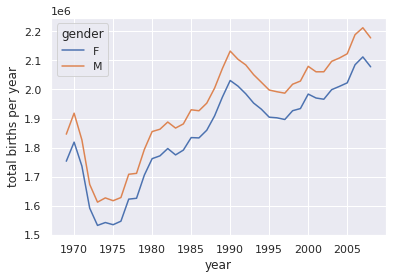

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [9]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [10]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [11]:
births['day'] = births['day'].astype(int)

<ipython-input-11-f34441c15b37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['day'] = births['day'].astype(int)


In [13]:
births.index = pd.to_datetime(10000 * births.year +
100 * births.month +
births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

<ipython-input-13-261557c73e13>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['dayofweek'] = births.index.dayofweek


<ipython-input-24-5b6e6f3ae6b4>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


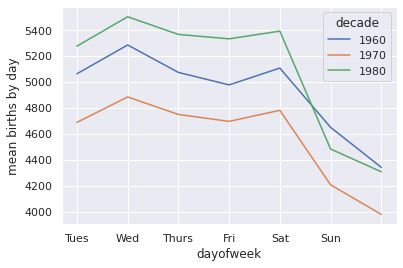

In [24]:
births.pivot_table('births', index='dayofweek',
columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [25]:
births_by_date = births.pivot_table('births',
[births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [26]:
births_by_date.index = [pd.datetime(2012, month, day)
for (month, day) in births_by_date.index]
births_by_date.head()

<ipython-input-26-7f32df19d6c5>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


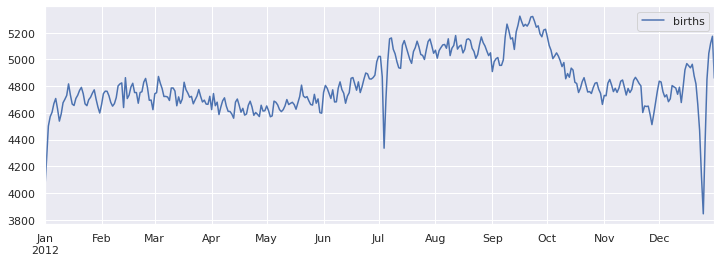

In [27]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

## Vectorized String Operations

In [33]:
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [34]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [37]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
try:
    [s.capitalize() for s in data]
except:
    print('Error')

Error


In [40]:
# vectorized string examples
names = pd.Series(data)
names.str.capitalize() # use method capitalize from string

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [41]:
# Tables of Pandas String Methods
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
'Eric Idle', 'Terry Jones', 'Michael Palin'])


In [42]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [43]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [47]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [48]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [49]:
# Vectorized item access and slicing
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [50]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [51]:
# indicator variables

full_monte = pd.DataFrame({'name': monte,
'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',
'B|C|D']})

In [52]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# Working with Time Series

In [169]:
from datetime import datetime
from dateutil import parser

In [194]:
date1 = datetime(year = 2015,month = 7,day = 4)
y1,m1,d1 = date1.year,date1.month,date1.day
print(y1,m1,d1)

2015 7 4


In [196]:
date2 = parser.parse("4th of July, 2015")
y2,m2,d2 = date2.year,date2.month,date2.day
print(y2,m2,d2)

2015 7 4


In [201]:
# Printing the day of the week
date1.strftime('%A')
date2.strftime('%A')

'Saturday'

In [181]:
# numpy datetime64
date = np.array('2015-05-04',dtype = np.datetime64)

In [189]:
# vectorized operations
date+np.arange(12)

array(['2015-05-04', '2015-05-05', '2015-05-06', '2015-05-07',
       '2015-05-08', '2015-05-09', '2015-05-10', '2015-05-11',
       '2015-05-12', '2015-05-13', '2015-05-14', '2015-05-15'],
      dtype='datetime64[D]')

In [191]:
# minute-based datetime

np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [192]:
# setting precision in nanoseconds
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

## Dates and times in Pandas: Best of both worlds

In [202]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [203]:
date.strftime('%A')

'Saturday'

In [207]:
# Numpy style vectorized operations
date + pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

In [208]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
'2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [209]:
# with this, is possible to perform slicing
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [215]:
# Pandas datetime is quite flexible
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
'2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [220]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [221]:
dates-dates[0]# creating a timedelta

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [222]:
#date_range()
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [223]:
# date_range() with periods
pd.date_range('2015-07-03',periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [224]:
pd.date_range('2015-07-03',periods = 8,freq = 'M')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [225]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Resampling, Shifting, and Windowing

In [229]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016',
data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [230]:
goog = goog['Close']

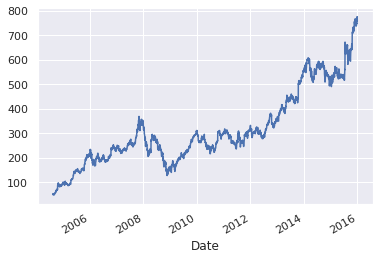

In [231]:
goog.plot();

Date
2004-08-19     49.982655
2004-08-20     53.952770
2004-08-23     54.495735
2004-08-24     52.239197
2004-08-25     52.802086
                 ...    
2015-12-24    748.400024
2015-12-28    762.510010
2015-12-29    776.599976
2015-12-30    771.000000
2015-12-31    758.880005
Name: Close, Length: 2863, dtype: float64

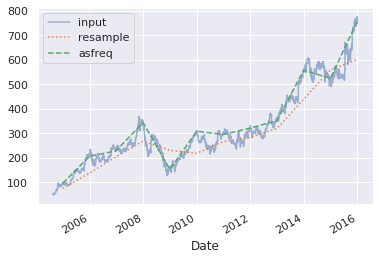

In [233]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
loc='upper left');

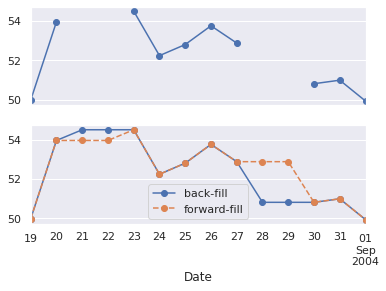

In [234]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

<ipython-input-235-54f672a8f43e>:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


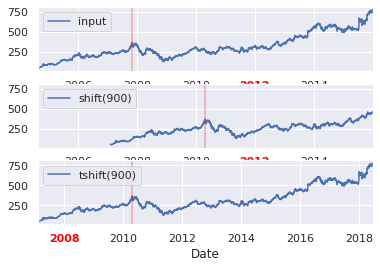

In [235]:
# time-shifts
fig, ax = plt.subplots(3, sharey=True)
# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])
# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

<ipython-input-236-500c6c126989>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


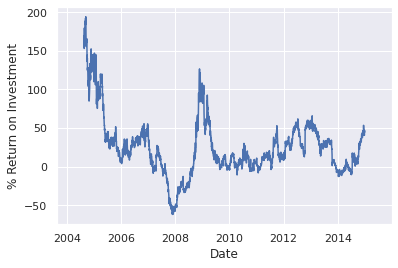

In [236]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');